# **::<h2 style='text-align: center;'>BRAZILIAN OLST RETAIL DATA ANALYSIS</h2>**

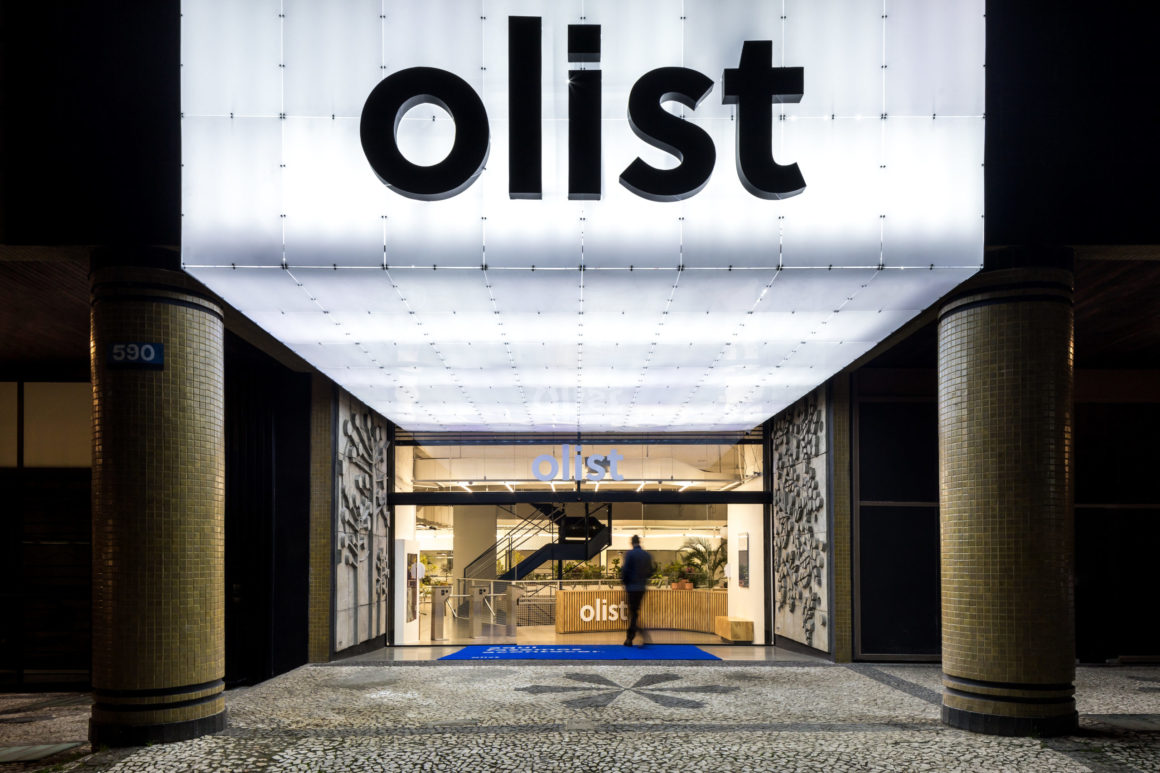

In [12]:
from PIL import Image

image1 = Image.open(r'C:\Users\harip\Downloads\Brazilian_Olist_Retail\Other files\olist-fachada-scaled.jpg')
display(image1)

About Dataset
* Brazilian E-Commerce Public Dataset by Olist

Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.   
Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.   
We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.  

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.  

Join it With the Marketing Funnel by Olist
We have also released a Marketing Funnel Dataset. You may join both datasets and see an order from Marketing perspective now!  

Instructions on joining are available on this Kernel.  

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.  

Attention
An order might have multiple items.  
Each item might be fulfilled by a distinct seller.  
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.  

Importing the basic libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector


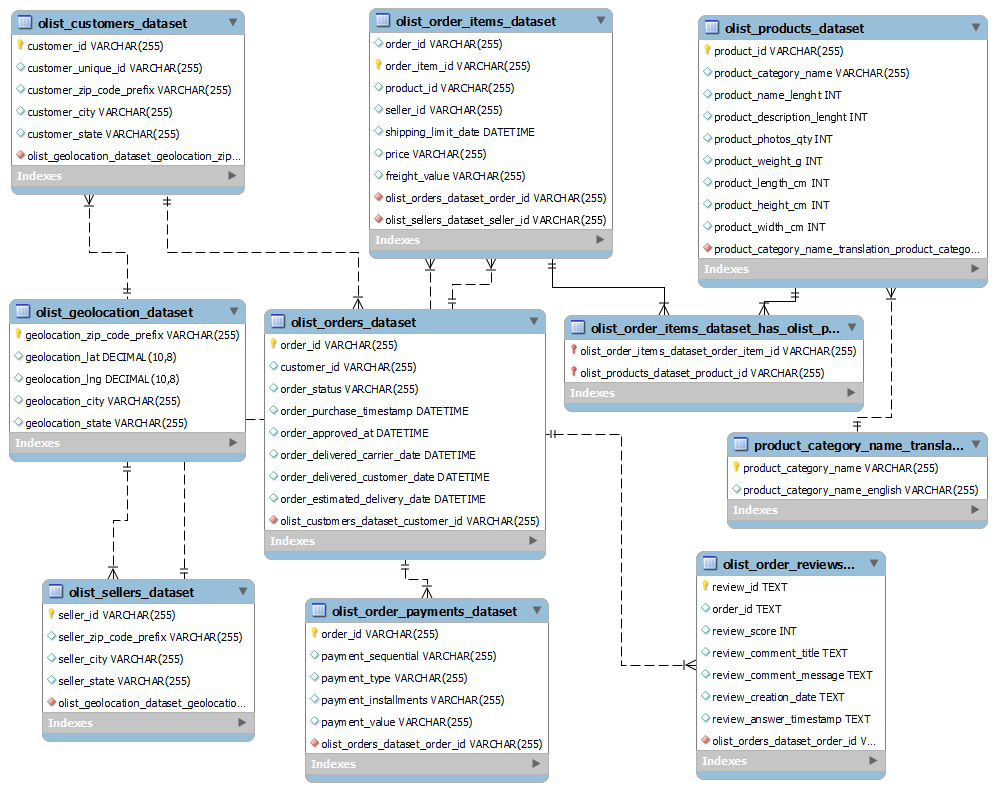

In [17]:
from PIL import Image

image1 = Image.open(r'C:\Users\harip\Downloads\Brazilian_Olist_Retail\Other files\olist data model.png')
display(image1)

In [18]:
import mysql.connector

database = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "password"
)

In [88]:
def load_sql_data(query):
    cursorObject = database.cursor()
    return pd.read_sql_query(query, database)

In [89]:
try:
    load_sql_data('use brazilian_olist_retail')
except TypeError:
    print('')
load_sql_data('show tables')

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\2132050637.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, database)


,Tables_in_brazilian_olist_retail
0,olist_customers_dataset
1,olist_geolocation_dataset
2,olist_order_items_dataset
3,olist_order_payments_dataset
4,olist_order_reviews_dataset
5,olist_orders_dataset
6,olist_products_dataset
7,olist_sellers_dataset
8,product_category_name_translation


-------------------------

## **Sales Analysis:**

--------------------------------------

* #### Total sales revenue over a period of time.


In [17]:
# Sales Revenue = Units Sold x Sales Price

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\2132050637.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, database)


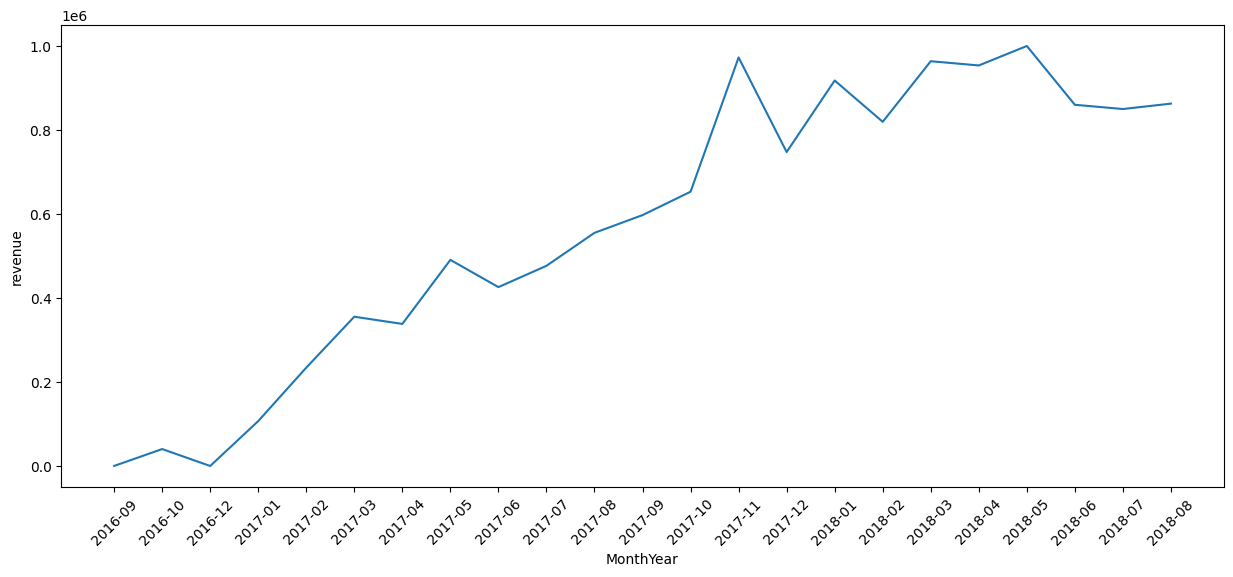

In [90]:
# load_sql_data('select order_item_id, count(order_item_id), sum(price) from olist_order_items_dataset group by order_item_id')
revenue_overtime = load_sql_data('''select date_format(str_to_date(o.order_approved_at , '%d-%m-%Y %H:%i '), '%Y-%m') AS MonthYear, 
count(i.order_item_id) as frequency, 
sum(i.price) as revenue
from olist_order_items_dataset as i 
join olist_orders_dataset as o 
on i.order_id = o.order_id 
where o.order_status = 'delivered'  
group by MonthYear order by MonthYear''')

plt.figure(figsize=(15, 6))
sns.lineplot(x = 'MonthYear', y = 'revenue', data= revenue_overtime)
plt.xticks(rotation=45)
plt.show()


There is a clear growth in sales as seen in the above graph

------------------------------------------------------------------------------------

* #### Seasonal variation of Average Revenue per order

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\2132050637.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, database)


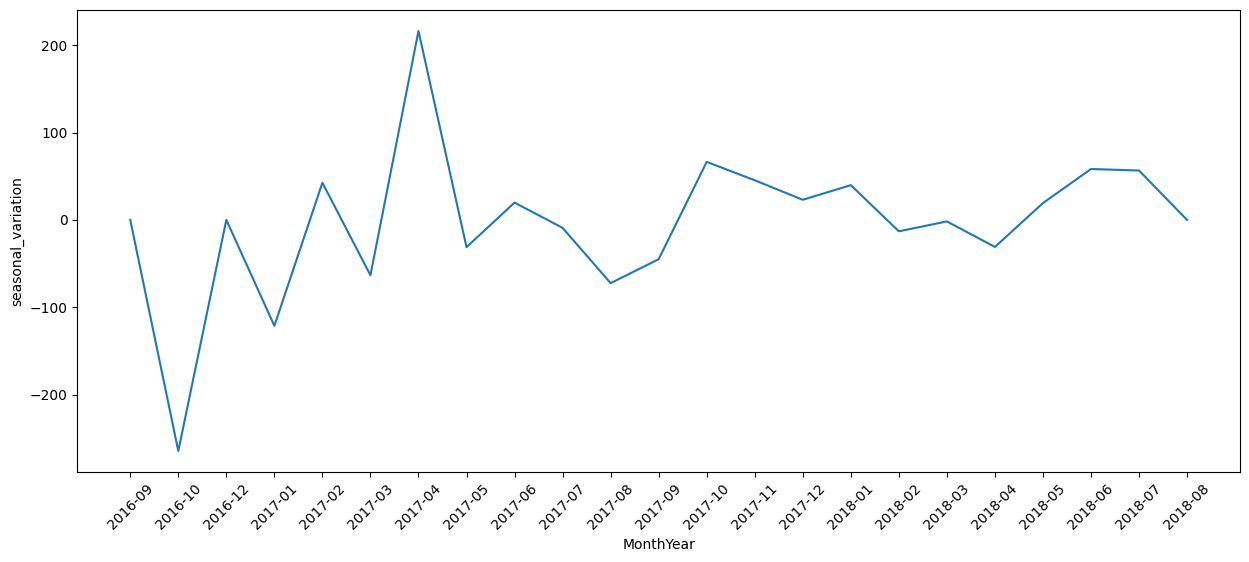

In [93]:
seasonal_variation = load_sql_data('''SELECT
    MonthYear,
    AVG(moving_avg_revenue) AS avg_revenue,
    sum(moving_avg_revenue - price) as seasonal_variation
FROM (
    SELECT
        DATE_FORMAT(STR_TO_DATE(o.order_approved_at, '%d-%m-%Y %H:%i'), '%Y-%m') AS MonthYear, price,
        avg(i.price) OVER (PARTITION BY DATE_FORMAT(STR_TO_DATE(o.order_approved_at, '%d-%m-%Y %H:%i'), '%Y-%m') 
                           ORDER BY o.order_approved_at ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg_revenue
    FROM
        olist_order_items_dataset AS i
    JOIN
        olist_orders_dataset AS o ON i.order_id = o.order_id
    WHERE
        o.order_status = 'delivered'
) AS subquery
GROUP BY
    MonthYear
ORDER BY
    MonthYear;''')
plt.figure(figsize=(15, 6))
sns.lineplot(x = 'MonthYear', y = 'seasonal_variation', data= seasonal_variation)
plt.xticks(rotation=45)
plt.show()

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\2132050637.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, database)


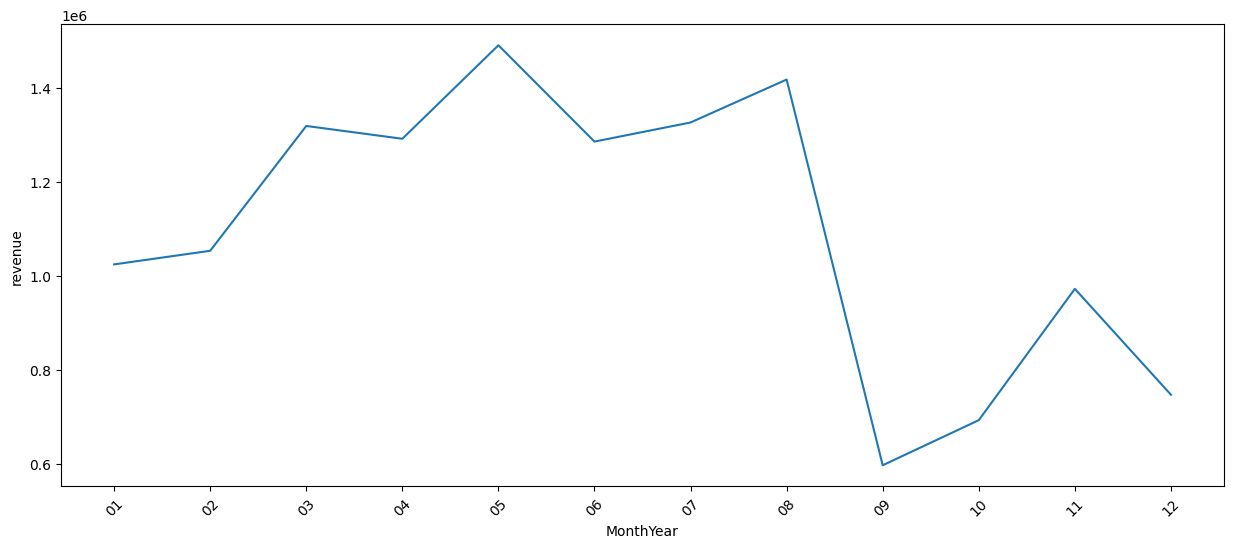

In [92]:
# load_sql_data('select order_item_id, count(order_item_id), sum(price) from olist_order_items_dataset group by order_item_id')
revenue_overtime = load_sql_data('''select date_format(str_to_date(o.order_approved_at , '%d-%m-%Y %H:%i '), '%m') AS MonthYear, 
count(i.order_item_id) as frequency, 
sum(i.price) as revenue
from olist_order_items_dataset as i 
join olist_orders_dataset as o 
on i.order_id = o.order_id 
where o.order_status = 'delivered'  
group by MonthYear order by MonthYear''')

plt.figure(figsize=(15, 6))
sns.lineplot(x = 'MonthYear', y = 'revenue', data= revenue_overtime)
plt.xticks(rotation=45)
plt.show()

From the above chart we can derive that,

Between the conclusion of 2016 and the commencement of 2017, there was a substantial variability in revenue per order. 
Following this period, the variance has remained relatively consistent, characterized by reduced fluctuations.

* #### Top 10 selling categories.

C:\Users\harip\AppData\Local\Temp\ipykernel_30544\3939090499.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, database)


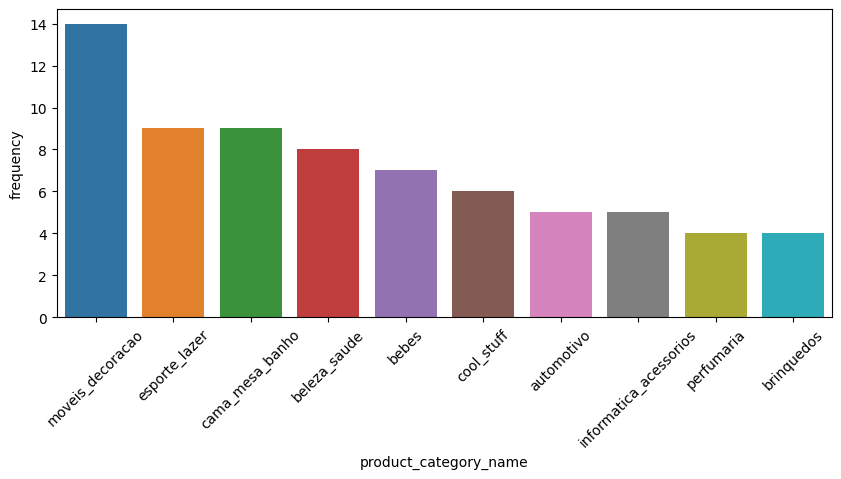

In [39]:
top_product_categories = load_sql_data('''select product_category_name, count(product_category_name) as frequency from olist_products_dataset 
group by product_category_name order by count(product_category_name) desc limit 10;''')

plt.figure(figsize=(10, 4))
sns.barplot(x = 'product_category_name', y = 'frequency', data= top_product_categories)
plt.xticks(rotation=45)
plt.show()

## **CUSTOMER ANALYSIS**

* #### Demographics

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\3939090499.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, database)


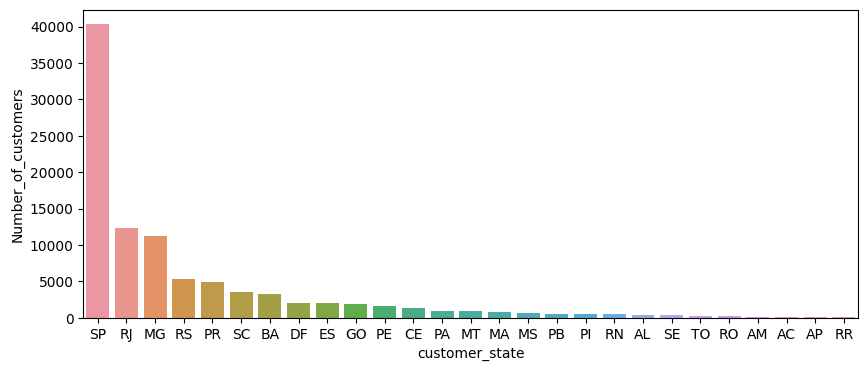

In [87]:
customer_state = load_sql_data('''select customer_state, count(distinct customer_unique_id) as Number_of_customers from olist_customers_dataset
group by customer_state order by count(distinct customer_unique_id) desc''')
plt.figure(figsize=(10, 4))

sns.barplot(x =customer_state['customer_state'],y = customer_state['Number_of_customers'])
plt.show()


* #### Repeat purchase rate

In [94]:
# Repeat Purchase Rate = (Number of Repeat Customers / Total Number of Customers) * 100

repeated_customers = load_sql_data('''select u.unique_customers, r.repeat_customers from
(select count(distinct customer_unique_id) as unique_customers from olist_customers_dataset) u,
(select count(*) as repeat_customers from (select customer_unique_id, count(customer_id) from olist_customers_dataset 
group by customer_unique_id  having count(customer_id) > 2) o) r;''')

C:\Users\harip\AppData\Local\Temp\ipykernel_2072\2132050637.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, database)


In [95]:
repeat_purchase_rate = (repeated_customers.iloc[0][1]/repeated_customers.iloc[0][0])*100
repeated_customers

,unique_customers,repeat_customers
0,96096,252


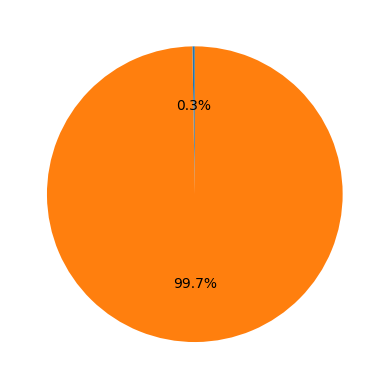

In [96]:
plt.pie([repeat_purchase_rate, 100 - repeat_purchase_rate],autopct='%1.1f%%', startangle=90)
plt.show()


Repeat Purchase rate is 0.3

________________________________

NameError: name '____________________________________' is not defined